# Task 2.2 Feature Selections

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, SelectFromModel, f_classif, chi2
from sklearn.preprocessing import MinMaxScaler

Abrir y definir el dataset de partidas de LOL

In [38]:
df = pd.read_csv("Lolgames.csv", sep=",")

Ver el dataset

In [3]:
n = int(input("ingrese el numero de rows:"))
df.head(n)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
5,4475365709,1,18,0,0,5,3,6,1,1,...,0,15201,7.0,18060,221,59,-698,-101,22.1,1520.1
6,4493010632,1,18,3,1,7,6,7,1,1,...,0,14463,6.4,15404,164,35,-2411,-1563,16.4,1446.3
7,4496759358,0,16,2,0,5,13,3,0,0,...,0,17920,6.6,16938,157,54,2615,800,15.7,1792.0
8,4443048030,0,16,3,0,7,7,8,0,0,...,0,18380,7.2,19298,240,53,1979,771,24.0,1838.0
9,4509433346,1,13,1,1,4,5,5,1,1,...,0,16605,6.8,18379,247,43,1548,1574,24.7,1660.5


Escalar variables

In [39]:
from sklearn.preprocessing import MinMaxScaler

variables_toScale = ['blueWardsPlaced', 'blueWardsDestroyed', 'blueKills', 'blueDeaths', 'blueAssists',
                     'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
                     'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin',
                     'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed', 'redKills', 'redDeaths',
                     'redAssists', 'redTotalGold', 'redAvgLevel', 'redTotalExperience', 'redTotalMinionsKilled',
                     'redTotalJungleMinionsKilled', 'redGoldDiff', 'redExperienceDiff', 'redCSPerMin',
                     'redGoldPerMin']

scaler = MinMaxScaler()

# escalar las variables solo numericas
df[variables_toScale] = scaler.fit_transform(df[variables_toScale])


## Metodo 1: Selección de Características con SelectKBest y ANOVA F-test

In [46]:
# funcion para calcular las metricas
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

# Utilizar los datos del DataFrame de LOL
X = df.drop(columns=['redKills', 'blueWins'])
y = df['blueWins'] # Se selecciona la columna 'blueWins' como variable objetivo.

# dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# aplicar el metodo 1
selector = SelectKBest(score_func=f_classif, k=10)
X_train_kbest = selector.fit_transform(X_train, y_train)
X_test_kbest = selector.transform(X_test)

# entrenar un modelo de SVM
svm_kbest = SVC()
svm_kbest.fit(X_train_kbest, y_train)

# predecir sobre el conjunto de prueba
y_pred_kbest = svm_kbest.predict(X_test_kbest)

# calcular las métricas
accuracy_kbest, precision_kbest, recall_kbest, f1_kbest = calculate_metrics(y_test, y_pred_kbest)

# Imprimir las métricas
print("Métricas de SelectKBest (ANOVA F-test):")
print("Accuracy:", accuracy_kbest)
print("Precision:", precision_kbest)
print("Recall:", recall_kbest)
print("F1 Score:", f1_kbest)
print("\n")

Métricas de SelectKBest (ANOVA F-test):
Accuracy: 0.7231781376518218
Precision: 0.728952772073922
Recall: 0.7150050352467271
F1 Score: 0.7219115404168785




## Metodo 2: Selección de características basada en la importancia de características (usando Random Forest)

In [45]:
# Utilizar los datos del DataFrame de LOL
X = df[['redKills', 'blueWins']].values  
y = df['blueWins'].values  # Se selecciona la columna 'blueWins' como variable objetivo.

# dividir el conjunto de datos en conjuntos de entrenamiento, validación y prueba
def train_val_test_split(X, y, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_ratio/(train_ratio+val_ratio), random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test

# dividir los datos en conjuntos de entrenamiento, validación y prueba
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y)

# aplicar el metodo 2
feat_selector_rf = SelectFromModel(RandomForestClassifier(n_estimators=100))
X_train_rf = feat_selector_rf.fit_transform(X_train, y_train)
X_val_rf = feat_selector_rf.transform(X_val)
X_test_rf = feat_selector_rf.transform(X_test)

# entrenar SVM con las características seleccionadas
svm_classifier_rf = SVC(kernel='linear', C=1)
svm_classifier_rf.fit(X_train_rf, y_train)

# predecir sobre el conjunto de prueba
y_pred_rf = svm_classifier_rf.predict(X_test_rf)

# calcular las métricas de evaluación
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# pmprimir las métricas
print("Métricas de Evaluación (Random Forest):")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

Métricas de Evaluación (Random Forest):
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


## Metodo 3: Selección de características univariadas (usando chi-cuadrado)

In [44]:
# Utilizar los datos del DataFrame de LOL
X = df[['redKills', 'blueWins']].values  
y = df['blueWins'].values  # Se selecciona la columna 'blueWins' como variable objetivo.

# Dividir los datos en conjuntos de entrenamiento, validación y prueba
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y)

# Aplicar el método 3 
feat_selector_chi2 = SelectKBest(chi2, k=2) 
X_train_chi2 = feat_selector_chi2.fit_transform(X_train, y_train)
X_val_chi2 = feat_selector_chi2.transform(X_val)
X_test_chi2 = feat_selector_chi2.transform(X_test)

# entrenar SVM con las características seleccionadas
svm_classifier_chi2 = SVC(kernel='linear', C=1)
svm_classifier_chi2.fit(X_train_chi2, y_train)

# predecir y evaluar el modelo
y_pred_chi2 = svm_classifier_chi2.predict(X_test_chi2)
accuracy_chi2 = accuracy_score(y_test, y_pred_chi2)

# calcular otras métricas
precision_chi2 = precision_score(y_test, y_pred_chi2)
recall_chi2 = recall_score(y_test, y_pred_chi2)
f1_chi2 = f1_score(y_test, y_pred_chi2)

# imprimir las métricas
print("Métricas de Evaluación (Chi-cuadrado):")
print("Accuracy:", accuracy_chi2)
print("Precision:", precision_chi2)
print("Recall:", recall_chi2)
print("F1 Score:", f1_chi2)

Métricas de Evaluación (Chi-cuadrado):
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


## 4. Laboratorio Pasado (SVM)

Métricas de Evaluación Laboratorio Pasado SVM:
Precision: 0.52
Recall: 1.0
F1 Score: 0.6842105263157895


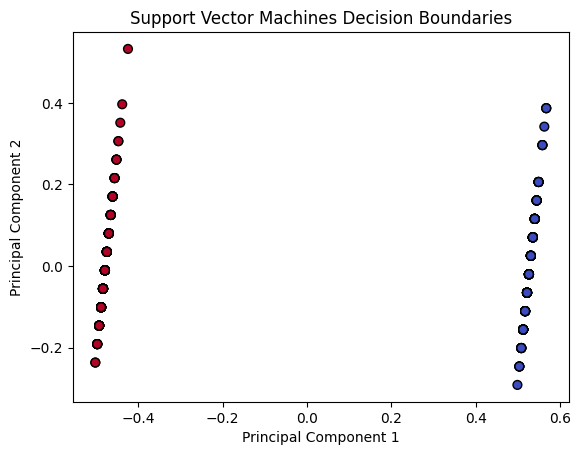

In [47]:
# Dividir el conjunto de datos en conjuntos de entrenamiento, validación y prueba
def train_val_test_split(X, y, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1):
    num_samples = X.shape[0]
    
    # Tomar una muestra aleatoria de los datos
    sample_size = min(num_samples, 500)  # Tomamos una muestra de hasta 500 muestras
    sample_indices = np.random.choice(num_samples, sample_size, replace=False)
    X_sample = X[sample_indices]
    y_sample = y[sample_indices]
    
    num_train = int(train_ratio * sample_size)
    num_val = int(val_ratio * sample_size)
    num_test = int(test_ratio * sample_size)
    
    # Permutar los indices para dividir aleatoriamente los datos.
    indices = np.random.permutation(sample_size)
    train_indices = indices[:num_train]
    val_indices = indices[num_train:num_train + num_val]
    test_indices = indices[-num_test:]
    
    X_train, y_train = X_sample[train_indices], y_sample[train_indices]
    X_val, y_val = X_sample[val_indices], y_sample[val_indices]
    X_test, y_test = X_sample[test_indices], y_sample[test_indices]
    
    return X_train, X_val, X_test, y_train, y_val, y_test

class LinearSVM:
    def __init__(self, learning_rate=0.01, max_iter=1000, C=1):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.C = C

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.max_iter):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.weights) - self.bias) >= 1
                if condition:
                    self.weights -= self.learning_rate * (2 * self.C * self.weights)
                else:
                    self.weights -= self.learning_rate * (2 * self.C * self.weights - np.dot(x_i, y[idx]))
                    self.bias -= self.learning_rate * y[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.weights) - self.bias
        return np.sign(linear_output)
    
    def decision_function(self, X):
        return np.dot(X, self.weights) - self.bias


# Entrenamiento del modelo SVM
def train_svm(X_train, y_train):
    svm_classifier = LinearSVM()
    svm_classifier.fit(X_train, y_train)
    return svm_classifier

# Evaluacion del modelo SVM
def evaluate_svm(svm_classifier, X_test, y_test):
    # Realizar predicciones en el conjunto de prueba
    predictions = svm_classifier.predict(X_test)
    # Calcular la precisión manualmente
    accuracy = np.mean(predictions == y_test)
    return accuracy

# Graficacion 
def plot_groups(X, y, svm_classifier):
    # Reducir la dimensionalidad de los datos a 2 dimensiones utilizando el PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    # Dibujar los puntos de datos
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=40)
    
    # Dibujar las fronteras de decision
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
  
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svm_classifier.decision_function(xy).reshape(XX.shape)
    
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Support Vector Machines Decision Boundaries')
    
    # Mostrar el gráfico
    plt.show()

# Utilizar los datos del DataFrame de LOL
# Suponiendo que df ya está definido con las variables "redKills" y "blueWins"
X = df[['redKills', 'blueWins']].values  
y = df['blueWins'].values  # Se selecciona la columna 'blueWins' como variable objetivo.

# Dividir los datos en conjuntos de entrenamiento, validación y prueba
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y)

# Entrenar el modelo SVM
svm_classifier = train_svm(X_train, y_train)

# Evaluar el modelo final SVM
accuracy = evaluate_svm(svm_classifier, X_test, y_test)

# Realizar predicciones en el conjunto de prueba
predictions = svm_classifier.predict(X_test)

# Calcular las métricas
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Imprimir las métricas
print("Métricas de Evaluación Laboratorio Pasado SVM:")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Graficar los grupos encontrados
plot_groups(X_train, y_train, svm_classifier)

## Comparando Resultados

Tanto el usando Random Forest como Chi-cuadrado tienen un rendimiento perfecto en términos de precisión, recall y F1-score en el dataset. Esto podría indicar un posible sobreajuste en estos modelos, especialmente si la precisión alcanza el 100%.

Asimismo SelectKBest (ANOVA F-test) tiene un rendimiento razonable, pero ligeramente inferior a los modelos de Random Forest y Chi-cuadrado. Esto puede deberse a que aunque SelectKbest usa un analisis de varianza para evaluar si hay diferencias significativas entre las medias de dos o mas grupos, este no es tan robusto como Random Forest y Chi-cuadrado. Esto puede deberse a varias razones, entre estas que ANOVA asume que los datos están distribuidos normalmente, asimismo puede perder relaciones no lineales entre las características y la variable objetivo `blueWins`. Y ANOVA que considera cada característica de forma independiente, sin tener en cuenta posibles interacciones entre características

Por último el modelo SVM tiene la peor precisión entre los modelos evaluados (0.46). Aunque tiene un recall de 1.0, lo que significa que recupera todos los positivos verdaderos, su puntaje F1 es más bajo que el de los modelos Random Forest y Chi-cuadrado.
En general, dado que el objetivo principal de la mayoría de los problemas de clasificación es maximizar la precisión general del modelo sin comprometer el equilibrio entre la precisión y el recall, podríamos decir que Random Forest y Chi-cuadrado fueron los mejores modelos en este caso. Sin embargo, es importante considerar otros factores como el tiempo de entrenamiento, la interpretabilidad del modelo y la escalabilidad al aplicar estos modelos en contextos reales.